In [6]:
from astroquery.jplhorizons import Horizons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions
import subprocess
import os
import time

Object and observatory details

In [7]:
object = 'Astraea'
start_date = '2024-01-01'
end_date = '2024-06-30'
step = '3d'
obs_code = 995

Import Horizons data

In [8]:
eph = functions.get_jpl_ephemeris(object, obs_code, start_date, end_date, step)
jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist = functions.get_jpl_elements(object)
jpl_elements = np.array([jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist], dtype=np.float64)

Plot difference between JPL Horizons orbital elements and those returned by find_orb for the JPL Horizons astrometry

2024-Jan-01 00:00
2024 01 01.00000
2024-Jan-04 00:00
2024 01 04.00000
2024-Jan-07 00:00
2024 01 07.00000
2024-Jan-10 00:00
2024 01 10.00000
2024-Jan-13 00:00
2024 01 13.00000
2024-Jan-16 00:00
2024 01 16.00000
2024-Jan-19 00:00
2024 01 19.00000
[-0.00794181 -0.01347718  0.00435898  0.01475265  0.00420281 -0.01838338
 -0.01686882 -0.01115535]
7 -0.00794180688661344
7 -0.013477180765772279
7 0.004358975894202723
7 0.014752648358103778
7 0.0042028111802984705
7 -0.018383377385826342
7 -0.016868821351708987
7 -0.011155347836985487
2024-Jan-01 00:00
2024 01 01.00000
2024-Jan-04 00:00
2024 01 04.00000
2024-Jan-07 00:00
2024 01 07.00000
2024-Jan-10 00:00
2024 01 10.00000
2024-Jan-13 00:00
2024 01 13.00000
2024-Jan-16 00:00
2024 01 16.00000
2024-Jan-19 00:00
2024 01 19.00000
2024-Jan-22 00:00
2024 01 22.00000
[-0.00703722 -0.01283138  0.00532753  0.03943621 -0.00083555 -0.01741625
 -0.02191182 -0.00661455]
8 -0.00703722122747353
8 -0.012831383984936471
8 0.005327534814855389
8 0.03943621154246

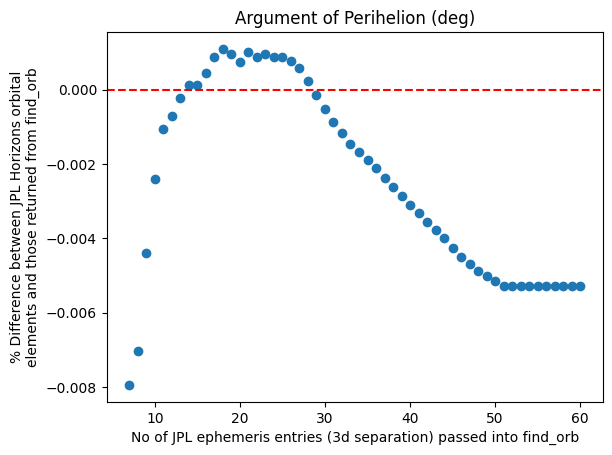

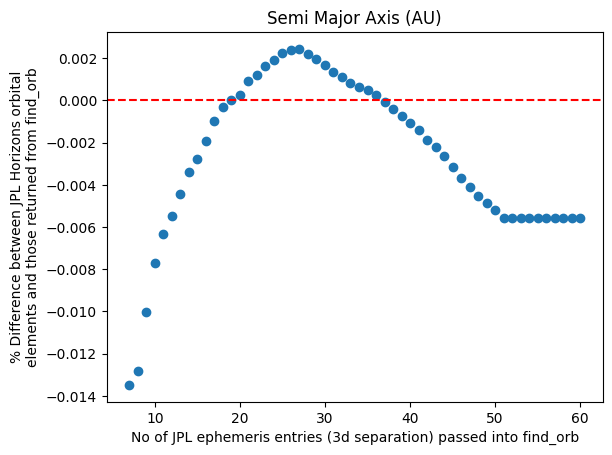

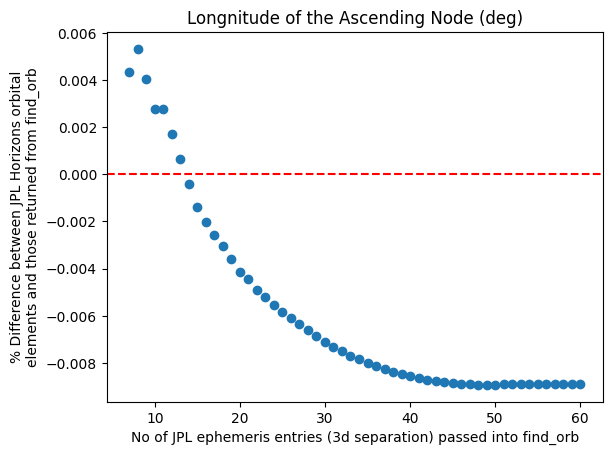

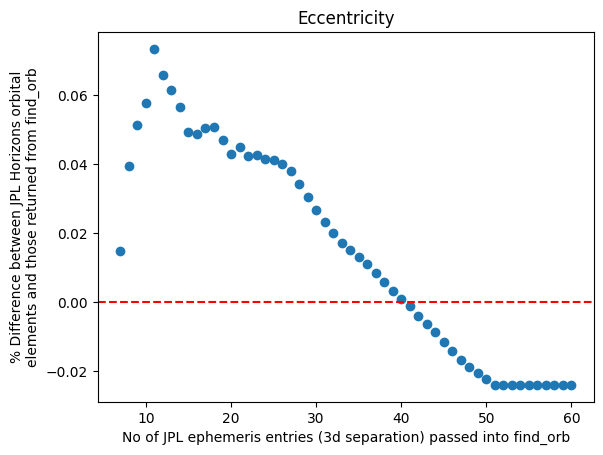

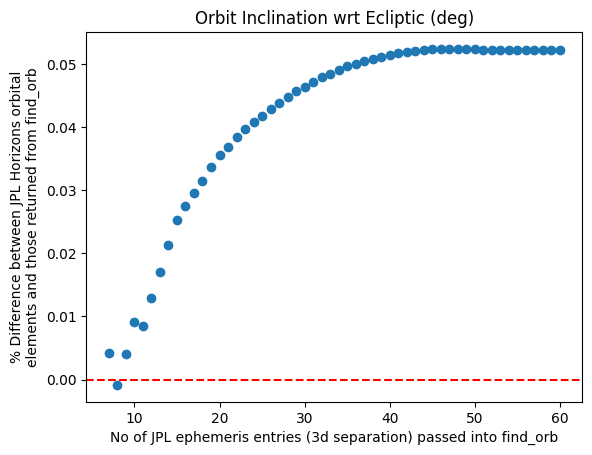

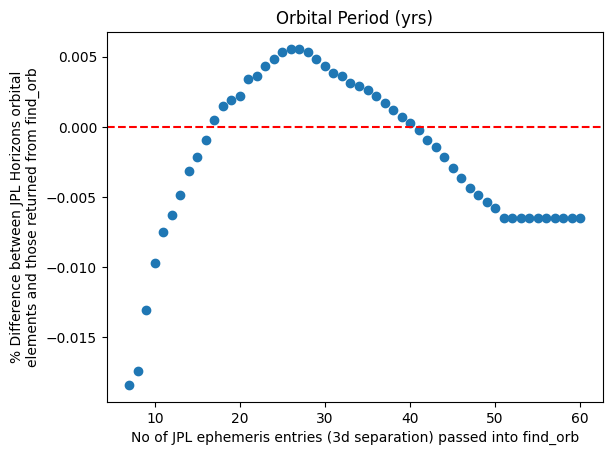

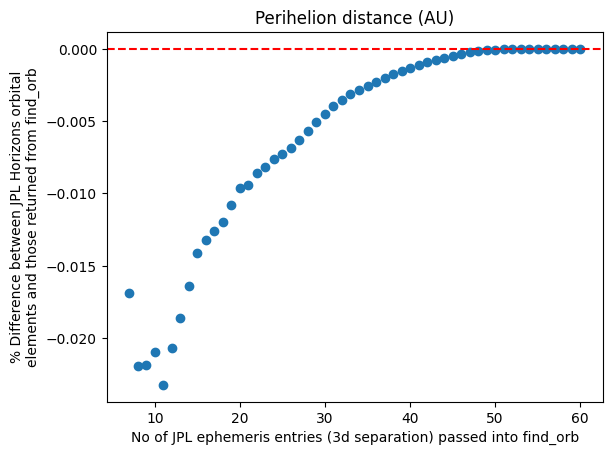

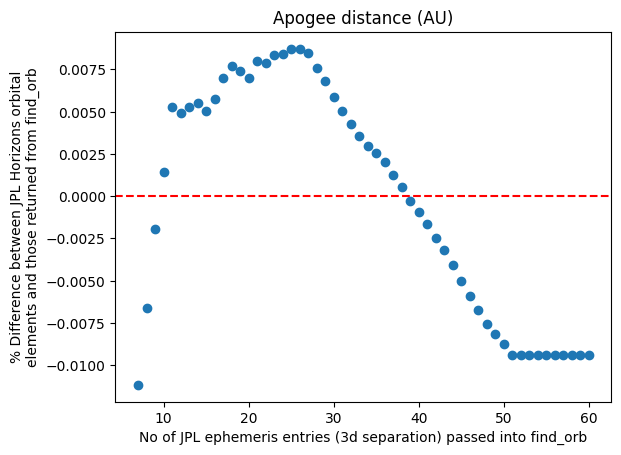

In [9]:
diffs = [[],[],[],[],[],[],[],[]]
no_of_obs = []

for j in range(7, len(eph)):
    #converts object name to the correct format for find_orb.
    object_list = []
    for l in range(0, 12):
        try:
            object_list.append(object[l])
        except:
            object_list.append(' ')
    object_designation = ''.join(map(str, object_list))

    functions.read_jpl_ephemeris(eph, object_designation, obs_code, rows_to_read=j)
    functions.run_find_orb('jpl_eph.txt')

    fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist = functions.read_fo_elements('elements.txt')
    fo_elements = np.array([fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist], dtype=np.float64)
    
    diff = (np.subtract(jpl_elements,fo_elements)/fo_elements)*100
    print(diff)
    for k in range(0, len(diff)):
        print(j, diff[k])
        diffs[k].append(diff[k])
    no_of_obs.append(j)

print(diffs)
print(no_of_obs)
elements = ['Argument of Perihelion (deg)', 'Semi Major Axis (AU)', 'Longnitude of the Ascending Node (deg)', 'Eccentricity', 'Orbit Inclination wrt Ecliptic (deg)', 'Orbital Period (yrs)', 'Perihelion distance (AU)', 'Apogee distance (AU)']
for i in range(0, len(diffs)):
    plt.figure(i)
    plt.xlabel(f'No of JPL ephemeris entries ({step} separation) passed into find_orb')
    plt.ylabel('% Difference between JPL Horizons orbital\nelements and those returned from find_orb')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{elements[i]}')
    plt.scatter(no_of_obs, diffs[i])